<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view, and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  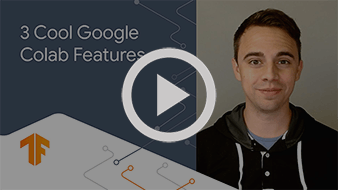
  </a>
</center>

#Importing all the Libraries

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras import utils
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Bidirectional, Dropout

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df=pd.read_excel('OSHA.xlsx',sheet_name='OSHA HSE DATA_ALL ABSTRACTS 15-')

In [ ]:
df.head()

In [ ]:
data=pd.DataFrame({'Description': df['Event Description'], 'Tagged2': df['Event type'] } )
data.head()

,Description,Tagged2
0,EMPLOYEE'S FINGERS AMPUTATED WHILE OPERATING A...,Caught in or between
1,EMPLOYEE'S FINGER IS CAUGHT IN DRILL AND IS AM...,Caught in or between
2,EMPLOYEE IS HOSPITALIZED AFTER BEING INJURED I...,Other
3,EMPLOYEE FALLS FROM ROOF AND IS INJURED,Fall (from elevation)
4,EMPLOYEE IS STRUCK BY PLYWOOD WHILE UNLOADING ...,Struck-by


In [ ]:
data.shape

(4847, 2)

In [ ]:
data['Tagged2'].value_counts()

Fall (from elevation)        1179
Struck-by                    1138
Caught in or between         1133
Other                         643
Shock                         194
Card-vascular/resp. fail.     179
Struck against                138
Fall (same level)             131
Inhalation                     82
Bite/sting/scratch              9
Rubbed/abraded                  7
Ingestion                       5
Rep. Motion/pressure            4
Absorption                      3
Name: Tagged2, dtype: int64

In [ ]:
# merging the classes

In [ ]:
import pandas as pd


# Class frequencies
class_frequencies = {
    'Fall (from elevation)': 1179,
    'Struck-by': 1138,
    'Caught in or between': 1133,
    'Other': 643,
    'Shock': 194,
    'Card-vascular/resp. fail.': 179,
    'Struck against': 138,
    'Fall (same level)': 131,
    'Inhalation': 82,
    'Bite/sting/scratch': 9,
    'Rubbed/abraded': 7,
    'Ingestion': 5,
    'Rep. Motion/pressure': 4,
    'Absorption': 3
}

# Merge classes based on conditions
merged_classes = {
    'Fall (from elevation)': 'Fall (from elevation)',
    'Struck-by': 'Struck-by',
    'Caught in or between': 'Caught in or between',
    'Other': 'Miscellaneous',
    'Shock': 'Miscellaneous',
    'Card-vascular/resp. fail.': 'Miscellaneous',
    'Struck against': 'Struck-by',
    'Fall (same level)': 'Fall (from elevation)',
    'Inhalation': 'Miscellaneous',
    'Bite/sting/scratch': 'Miscellaneous',
    'Rubbed/abraded': 'Miscellaneous',
    'Ingestion': 'Miscellaneous',
    'Rep. Motion/pressure': 'Miscellaneous',
    'Absorption': 'Miscellaneous'
}

# Merge classes in the DataFrame
data['Tagged2'] = data['Tagged2'].apply(lambda x: merged_classes.get(x, x))

# Check the updated DataFrame
print(data)


                                            Description                Tagged2
0     EMPLOYEE'S FINGERS AMPUTATED WHILE OPERATING A...   Caught in or between
1     EMPLOYEE'S FINGER IS CAUGHT IN DRILL AND IS AM...   Caught in or between
2     EMPLOYEE IS HOSPITALIZED AFTER BEING INJURED I...          Miscellaneous
3               EMPLOYEE FALLS FROM ROOF AND IS INJURED  Fall (from elevation)
4     EMPLOYEE IS STRUCK BY PLYWOOD WHILE UNLOADING ...              Struck-by
...                                                 ...                    ...
4842  EMPLOYEE FALLS FROM BILLBOARD, SUSTAINS TRAUMA...  Fall (from elevation)
4843  EMPLOYEE FALLS FROM ELEVATION, SUSTAINS HEAD T...  Fall (from elevation)
4844  EMPLOYEE FOUND UNRESPONSIVE BY HOME OWNER DURI...          Miscellaneous
4845  EMPLOYEE IS STRUCK AND KILLED BY LOGGING TRUCK...              Struck-by
4846  EMPLOYEE IS STRUCK BY OVERTURNED STANDUP FORKL...              Struck-by

[4847 rows x 2 columns]


In [ ]:
data['Tagged2'].value_counts()

Fall (from elevation)    1310
Struck-by                1276
Caught in or between     1133
Miscellaneous            1126
Name: Tagged2, dtype: int64

In [ ]:
# pre-processing

In [ ]:
data['Tagged2'].isnull().sum()

2

In [ ]:
# Find null values in the 'Tagged2' column
null_indices = data[data['Tagged2'].isnull()].index
print("Indices of null values in 'Tagged2' column:", null_indices)
data.iloc[null_indices]

Indices of null values in 'Tagged2' column: Int64Index([1294, 1660], dtype='int64')


,Description,Tagged2
1294,NO RECORDABLE INJURY,NaN
1660,EMPLOYEES EXPOSED TO ASBESTOS WHILE CLEANING U...,NaN


In [ ]:
data.dropna(inplace=True)
data['Tagged2'].isnull().sum()

0

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string


# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Removing punctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Join tokens back to form a cleaned sentence
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Apply preprocessing to the 'description' column
data['cleaned_description'] = data['Description'].apply(preprocess_text)

# Display the preprocessed DataFrame
# print(data.head())


### **Processed Data reading**

In [ ]:
data=pd.read_excel('Osha_processed_data.xlsx')
data.head()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the counts of classes
class_counts = data['Tagged2'].value_counts()

# Define custom colors for each class
custom_colors = ['blue', 'green', 'red', 'orange']  # You can add more colors as needed

# Plot the bar chart with custom colors
class_counts.plot(kind='bar', color=custom_colors)

# Add labels and title
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Counts of Classes')

# Add numbers at the top of each bar
for i, count in enumerate(class_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Set class names tilted
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# using topic modelling, svc

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import numpy as np

# Assuming df is your DataFrame with 'description' and 'target' columns

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_description'], data['Tagged2'], test_size=0.2, random_state=42)

# Tokenize and vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Fit a topic model on the training data
corpus = [doc.split() for doc in X_train]
dictionary = Dictionary(corpus)
corpus = [dictionary.doc2bow(doc) for doc in corpus]
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary)

# Extract topic distributions for documents in training and test sets
X_train_topics = [lda_model[dictionary.doc2bow(doc.split())] for doc in X_train]
X_test_topics = [lda_model[dictionary.doc2bow(doc.split())] for doc in X_test]

# Reshape topic distributions into a consistent shape
X_train_topics_array = np.zeros((len(X_train_topics), lda_model.num_topics))
for i, dist in enumerate(X_train_topics):
    for topic, prob in dist:
        X_train_topics_array[i, topic] = prob

X_test_topics_array = np.zeros((len(X_test_topics), lda_model.num_topics))
for i, dist in enumerate(X_test_topics):
    for topic, prob in dist:
        X_test_topics_array[i, topic] = prob

# Fit a Support Vector Classifier on the reshaped topic distributions
classifier = SVC(kernel='linear')
classifier.fit(X_train_topics_array, y_train)

# Predict using the classifier
y_pred = classifier.predict(X_test_topics_array)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.5232198142414861
Classification Report:
                        precision    recall  f1-score   support

 Caught in or between       0.57      0.63      0.60       203
Fall (from elevation)       0.48      0.90      0.63       268
        Miscellaneous       0.54      0.49      0.51       224
            Struck-by       0.61      0.11      0.19       274

             accuracy                           0.52       969
            macro avg       0.55      0.53      0.48       969
         weighted avg       0.55      0.52      0.47       969



### clstm model

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score

# Sample data
texts = data['cleaned_description']
labels = data['Tagged2']

# Tokenize the text data
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
x = pad_sequences(sequences)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
y_categorical = to_categorical(y, num_classes=len(label_encoder.classes_))

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced',classes= np.unique(y),y= y)

# Split the data into training and testing sets with stratified split and class weights
x_train, x_test, y_train, y_test = train_test_split(x, y_categorical, test_size=0.2, random_state=1, stratify=y, shuffle=True)

# Create the model
model = Sequential()
model.add(Embedding(max_words, 100, input_length=x.shape[1]))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(LSTM(100))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Fit the model with class weights
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test), class_weight=dict(enumerate(class_weights)))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Convert one-hot encoded labels back to integer labels for comparison
y_test_int = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Calculate accuracy
accuracy = accuracy_score(y_test_int, y_pred_classes)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test_int, y_pred_classes)
print("Classification Report:\n", classification_rep)


In [ ]:
# ensemble model of rf, svc, logistic, boosting

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

X=data['cleaned_description']
y=data['Tagged2']

# Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual models (including XGBoost)
rf = RandomForestClassifier(n_estimators=100)
svc = SVC(kernel='linear', probability=True)
lr = LogisticRegression(max_iter=1000)
xgb = XGBClassifier(n_estimators=50)

# Create a voting ensemble using 'soft' voting
ensemble = VotingClassifier(estimators=[('rf', rf), ('svc', svc), ('lr', lr), ('xgb', xgb)], voting='soft')

# Fit the ensemble model
ensemble.fit(X_train, y_train)

# Predict using the ensemble
y_pred = ensemble.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test,y_pred))


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

X=data['cleaned_description']
y=data['Tagged2']

# Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual models (including XGBoost)
svc = SVC(kernel='linear', probability=True)
xgb = XGBClassifier(n_estimators=50)

# Create a voting ensemble using 'soft' voting
ensemble = VotingClassifier(estimators=[ ('svc', svc), ('xgb', xgb)], voting='soft')

# Fit the ensemble model
ensemble.fit(X_train, y_train)

# Predict using the ensemble
y_pred = ensemble.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test,y_pred))


VOTING CLASSIFIER (SVC+LR)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

X=data['cleaned_description']
y=data['Tagged2']

# Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual models (including XGBoost)
svc = SVC(kernel='linear', probability=True)
lr = LogisticRegression(max_iter=1000)

# Create a voting ensemble using 'soft' voting
ensemble = VotingClassifier(estimators=[('svc', svc), ('lr', lr)], voting='soft')

# Fit the ensemble model
ensemble.fit(X_train, y_train)

# Predict using the ensemble
y_pred = ensemble.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test,y_pred))


Ensemble Model Accuracy: 0.83
                       precision    recall  f1-score   support

 Caught in or between       0.77      0.86      0.81       203
Fall (from elevation)       0.92      0.93      0.93       268
        Miscellaneous       0.82      0.79      0.80       224
            Struck-by       0.82      0.76      0.79       274

             accuracy                           0.83       969
            macro avg       0.83      0.83      0.83       969
         weighted avg       0.84      0.83      0.83       969



#Confusion Matrix

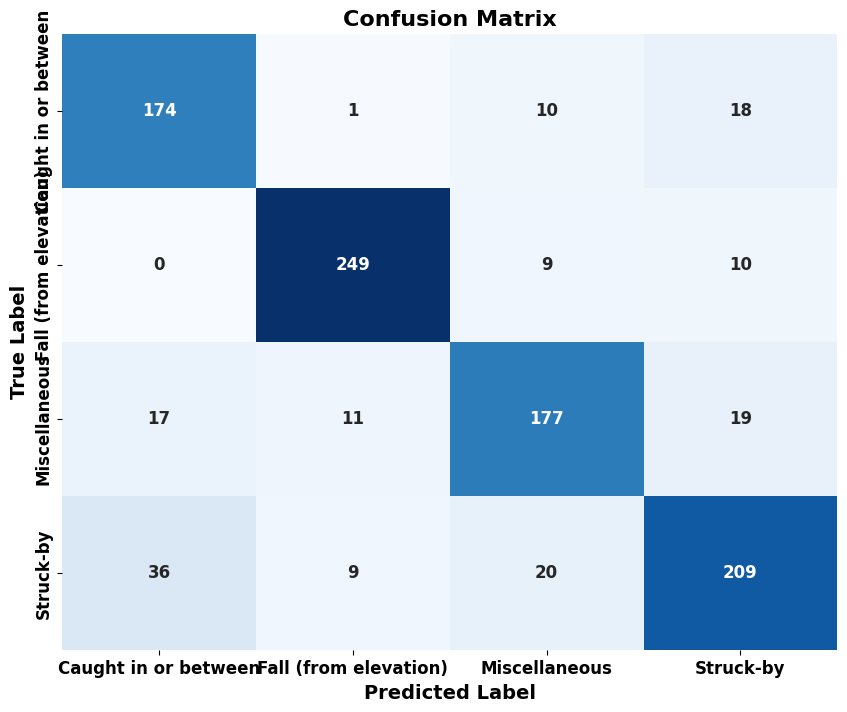

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=ensemble.classes_, yticklabels=ensemble.classes_,
            annot_kws={"size": 12, "weight": "bold"}, cbar=False)
plt.title("Confusion Matrix", fontsize=16, fontweight='bold')
plt.xlabel("Predicted Label", fontsize=14, fontweight='bold')
plt.ylabel("True Label", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[174   1  10  18]
 [  0 249   9  10]
 [ 17  11 177  19]
 [ 36   9  20 209]]


In [ ]:
# Define the indices
indices = [497, 3991, 3905, 2382, 1696, 1452, 61, 354]

# Create a DataFrame for the selected samples
selected_samples = data.loc[indices]


# Vectorize the preprocessed text data
selected_vectorized = vectorizer.transform(selected_samples['cleaned_description'])

# Make predictions using the ensemble model
predicted_labels = ensemble.predict(selected_vectorized)


# Create the result table
result_table = pd.DataFrame({
    'Hazard description': selected_samples['Description'],
    'Actual Output': selected_samples['Tagged2'],
    'Predicted Output': predicted_labels
}, index=indices)

# Display the result table
(result_table)


In [ ]:
# cross validation

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

X = data['cleaned_description']
y = data['Tagged2']

# Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Initialize individual models (including XGBoost)
svc = SVC(kernel='linear', probability=True)
lr = LogisticRegression(max_iter=1000)

# Create a voting ensemble using 'soft' voting
ensemble = VotingClassifier(estimators=[('svc', svc), ('lr', lr)], voting='soft')

# Use stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and compute scores
cv_scores = cross_val_score(ensemble, X, y, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Optionally, fit the ensemble model on the entire dataset
# ensemble.fit(X, y)


Cross-Validation Scores: [0.81424149 0.82868937 0.82662539 0.81940144 0.81630547]
Mean Accuracy: 0.8210526315789473


Applying class imbalance handling technique: While splitting Train and Test data, you can give the stratify parameter the output column that you are trying to predict, so that they show a balanced distribution on the train and test set.

with stratify split

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

X=data['cleaned_description']
y=data['Tagged2']

# Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify = data['Tagged2'])

# Initialize individual models (including XGBoost)
svc = SVC(kernel='linear', probability=True)
lr = LogisticRegression(max_iter=1000)

# Create a voting ensemble using 'soft' voting
ensemble = VotingClassifier(estimators=[('svc', svc), ('lr', lr)], voting='soft')

# Fit the ensemble model
ensemble.fit(X_train, y_train)

# Predict using the ensemble
y_pred = ensemble.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test,y_pred))


In [ ]:
# # Calculate class weights
# class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
# class_weights

In [ ]:
# individual models: svc and logistic regression

In [ ]:
# SVC

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score

# Preprocess your text data and get X_text (list of text descriptions) and y (list of labels)

X=data['cleaned_description']

y=data['Tagged2']

# Apply TF-IDF transformation
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_tfidf = vectorizer.fit_transform(X)

# Convert text labels to numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# Train Random Forest Classifier
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train, y_train)

# Predictions
y_pred = svc_classifier.predict(X_test)

# Convert numerical labels back to text labels
y_pred_text = label_encoder.inverse_transform(y_pred)
y_test_text = label_encoder.inverse_transform(y_test)

# Evaluate the model
print('accuracy_score:',accuracy_score(y_test_text, y_pred_text))

report = classification_report(y_test_text, y_pred_text)
print(report)



with stratify split

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score

# Preprocess your text data and get X_text (list of text descriptions) and y (list of labels)

X=data['cleaned_description']

y=data['Tagged2']

# Apply TF-IDF transformation
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_tfidf = vectorizer.fit_transform(X)

# Convert text labels to numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42,stratify = data['Tagged2'])

# Train Random Forest Classifier
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train, y_train)

# Predictions
y_pred = svc_classifier.predict(X_test)

# Convert numerical labels back to text labels
y_pred_text = label_encoder.inverse_transform(y_pred)
y_test_text = label_encoder.inverse_transform(y_test)

# Evaluate the model
print('accuracy_score:',accuracy_score(y_test_text, y_pred_text))

report = classification_report(y_test_text, y_pred_text)
print(report)



with class weight

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score

# Preprocess your text data and get X_text (list of text descriptions) and y (list of labels)

X=data['cleaned_description']

y=data['Tagged2']

# Apply TF-IDF transformation
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_tfidf = vectorizer.fit_transform(X)

# Convert text labels to numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# Compute sample weights based on class weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Train Random Forest Classifier
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train, y_train, sample_weight=sample_weights)

# Predictions
y_pred = svc_classifier.predict(X_test)

# Convert numerical labels back to text labels
y_pred_text = label_encoder.inverse_transform(y_pred)
y_test_text = label_encoder.inverse_transform(y_test)

# Evaluate the model
print('accuracy_score:',accuracy_score(y_test_text, y_pred_text))

report = classification_report(y_test_text, y_pred_text)
print(report)



accuracy_score: 0.8245614035087719
                       precision    recall  f1-score   support

 Caught in or between       0.74      0.85      0.79       203
Fall (from elevation)       0.93      0.93      0.93       268
        Miscellaneous       0.83      0.76      0.79       224
            Struck-by       0.79      0.76      0.77       274

             accuracy                           0.82       969
            macro avg       0.82      0.82      0.82       969
         weighted avg       0.83      0.82      0.82       969



In [ ]:
# LR

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Preprocess your text data and get X_text (list of text descriptions) and y (list of labels)

X=data['cleaned_description']

y=data['Tagged2']

# Apply TF-IDF transformation
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_tfidf = vectorizer.fit_transform(X)

# Convert text labels to numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# Train Random Forest Classifier
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train, y_train)

# Predictions
y_pred = LR_classifier.predict(X_test)

# Convert numerical labels back to text labels
y_pred_text = label_encoder.inverse_transform(y_pred)
y_test_text = label_encoder.inverse_transform(y_test)

# Evaluate the model
print('accuracy_score:',accuracy_score(y_test_text, y_pred_text))

report = classification_report(y_test_text, y_pred_text)
print(report)


accuracy_score: 0.8286893704850361
                       precision    recall  f1-score   support

 Caught in or between       0.76      0.84      0.80       203
Fall (from elevation)       0.92      0.93      0.93       268
        Miscellaneous       0.81      0.77      0.79       224
            Struck-by       0.81      0.77      0.79       274

             accuracy                           0.83       969
            macro avg       0.82      0.83      0.83       969
         weighted avg       0.83      0.83      0.83       969



In [ ]:
# XGboost

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

# Assuming you have already defined your X and y
X = data['cleaned_description']
y = data['Tagged2']

# Apply TF-IDF transformation
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_tfidf = vectorizer.fit_transform(X)

# Convert text labels to numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# Train XGBoost Classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Predictions
y_pred = xgb_classifier.predict(X_test)

# Convert numerical labels back to text labels
y_pred_text = label_encoder.inverse_transform(y_pred)
y_test_text = label_encoder.inverse_transform(y_test)

# Evaluate the model
print('accuracy_score:', accuracy_score(y_test_text, y_pred_text))

report = classification_report(y_test_text, y_pred_text)
print(report)


accuracy_score: 0.8214654282765738
                       precision    recall  f1-score   support

 Caught in or between       0.76      0.85      0.80       203
Fall (from elevation)       0.93      0.94      0.93       268
        Miscellaneous       0.78      0.76      0.77       224
            Struck-by       0.80      0.74      0.77       274

             accuracy                           0.82       969
            macro avg       0.82      0.82      0.82       969
         weighted avg       0.82      0.82      0.82       969



In [ ]:
# SVC, adaboost

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

X=data['cleaned_description']
y=data['Tagged2']

# Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual models (including XGBoost)
svc = SVC(kernel='linear', probability=True)
adb = AdaBoostClassifier(n_estimators=50)

# Create a voting ensemble using 'soft' voting
ensemble = VotingClassifier(estimators=[('svc', svc), ('adb', adb)], voting='soft')

# Fit the ensemble model
ensemble.fit(X_train, y_train)

# Predict using the ensemble
y_pred = ensemble.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test,y_pred))


In [ ]:
# SVC, rf

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

X=data['cleaned_description']
y=data['Tagged2']

# Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual models (including XGBoost)
rf = RandomForestClassifier(n_estimators=100)
svc = SVC(kernel='linear', probability=True)
lr = LogisticRegression(max_iter=1000)
xgb = XGBClassifier(n_estimators=50)

# Create a voting ensemble using 'soft' voting
ensemble = VotingClassifier(estimators=[('rf', rf), ('svc', svc)], voting='soft')

# Fit the ensemble model
ensemble.fit(X_train, y_train)

# Predict using the ensemble
y_pred = ensemble.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test,y_pred))


In [ ]:
# SVC, nb

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = data['cleaned_description']
y = data['Tagged2']

# Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual models (including Naive Bayes)
svc = SVC(kernel='linear', probability=True)
nb = MultinomialNB()

# Create a voting ensemble using 'soft' voting
ensemble = VotingClassifier(estimators=[('svc', svc), ('nb', nb)], voting='soft')

# Fit the ensemble model
ensemble.fit(X_train, y_train)

# Predict using the ensemble
y_pred = ensemble.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


Ensemble Model Accuracy: 0.83
                       precision    recall  f1-score   support

 Caught in or between       0.76      0.84      0.79       203
Fall (from elevation)       0.93      0.93      0.93       268
        Miscellaneous       0.84      0.78      0.81       224
            Struck-by       0.80      0.77      0.79       274

             accuracy                           0.83       969
            macro avg       0.83      0.83      0.83       969
         weighted avg       0.83      0.83      0.83       969



In [ ]:
# word2vec with voting classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import gensim
import numpy as np


X=data['cleaned_description']
y=data['Tagged2']

# Tokenize your text data and create word sequences
sentences = [doc.split() for doc in X]

# Train Word2Vec model
word2vec_model = gensim.models.Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)  # Adjust parameters as needed

# Define a function to create document vectors from Word2Vec word vectors
def document_vector(word_list):
    vectors = [word2vec_model.wv[word] for word in word_list if word in word2vec_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)  # Adjust vector size based on the Word2Vec model

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create document vectors for training and testing data
X_train_vec = np.array([document_vector(doc.split()) for doc in X_train])
X_test_vec = np.array([document_vector(doc.split()) for doc in X_test])

# Initialize individual models
rf = RandomForestClassifier(n_estimators=100)
svc = SVC(kernel='linear', probability=True)
lr = LogisticRegression(max_iter=1000)
xgb = XGBClassifier(n_estimators=50)  # Replace AdaBoost with XGBoost

# Create a voting ensemble using 'soft' voting
ensemble = VotingClassifier(estimators=[('rf', rf), ('svc', svc), ('lr', lr), ('xgb', xgb)], voting='soft')

# Fit the ensemble model
ensemble.fit(X_train_vec, y_train)

# Predict using the ensemble
y_pred = ensemble.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy using Word2Vec: {accuracy:.2f}")


Ensemble Model Accuracy using Word2Vec: 0.75


In [ ]:
# glove with voting classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

X=data['cleaned_description']
y=data['Tagged2']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to create document vectors from GloVe word vectors
def document_vector(word_list):
    return np.mean([glove_model.get(word, np.zeros(300)) for word in word_list], axis=0)

# Load GloVe word vectors (change the file path to your GloVe file)
glove_file = 'glove.6B.300d.txt'
glove_model = {}
with open(glove_file, 'r', encoding='utf-8') as file:
    for line in file:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype='float32')
        glove_model[word] = vector

# Create document vectors for training and testing data
X_train_vec = np.array([document_vector(doc.split()) for doc in X_train])
X_test_vec = np.array([document_vector(doc.split()) for doc in X_test])

# Initialize individual models
rf = RandomForestClassifier(n_estimators=100)
svc = SVC(kernel='linear', probability=True)
lr = LogisticRegression(max_iter=1000)
xgb = XGBClassifier(n_estimators=50)

# Create a voting ensemble using 'soft' voting
ensemble = VotingClassifier(estimators=[('rf', rf), ('svc', svc), ('lr', lr), ('xgb', xgb)], voting='soft')

# Fit the ensemble model
ensemble.fit(X_train_vec, y_train)

# Predict using the ensemble
y_pred = ensemble.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy using GloVe: {accuracy:.2f}")


Ensemble Model Accuracy using GloVe: 0.45


In [ ]:
# bi-LSTM (20 epochs)

**# Bi-LSTM**

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score

from tensorflow.keras.preprocessing.text import Tokenizer
X=data['cleaned_description']
y=data['Tagged2']

max_features = 430
tokenizer = Tokenizer(num_words = max_features, )
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X, padding = 'post' ,maxlen=300)
y = pd.get_dummies(y).values

vocab_size = len(tokenizer.word_index)+1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.20, random_state=42)
print(X_train.shape,y_train.shape)
# print(X_test.shape,y_test.shape)

(3876, 300) (3876, 4)


In [ ]:
# Training with Keras default Embedding Layer

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

embid_dim = 300
lstm_out = 128

model = keras.Sequential()
model.add(Embedding(max_features, embid_dim, input_length = X.shape[1]))
model.add(Bidirectional(LSTM(lstm_out, dropout=0.2)))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 300)          129000    
                                                                 
 bidirectional (Bidirection  (None, 256)               439296    
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                      

In [ ]:
batch_size = 128
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 20, batch_size=batch_size, verbose = 1, validation_split=0.1)

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

31/31 [==============================] - 9s 276ms/step - loss: 0.7509 - accuracy: 0.7988


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Convert one-hot encoded labels back to integer labels for comparison
y_test_int = np.argmax(y_test, axis=1)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Calculate accuracy
accuracy = accuracy_score(y_test_int, y_pred_classes)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test_int, y_pred_classes)
print("Classification Report:\n", classification_rep)


In [ ]:
model.save('Bi-LSTM_model_0.80.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('Bi-LSTM_model_0.80.h5')

# Print the model summary
loaded_model.summary()


In [ ]:
# Convert one-hot encoded labels back to integer labels for comparison
y_test_int = np.argmax(y_test, axis=1)
y_pred = loaded_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

31/31 [==============================] - 20s 511ms/step


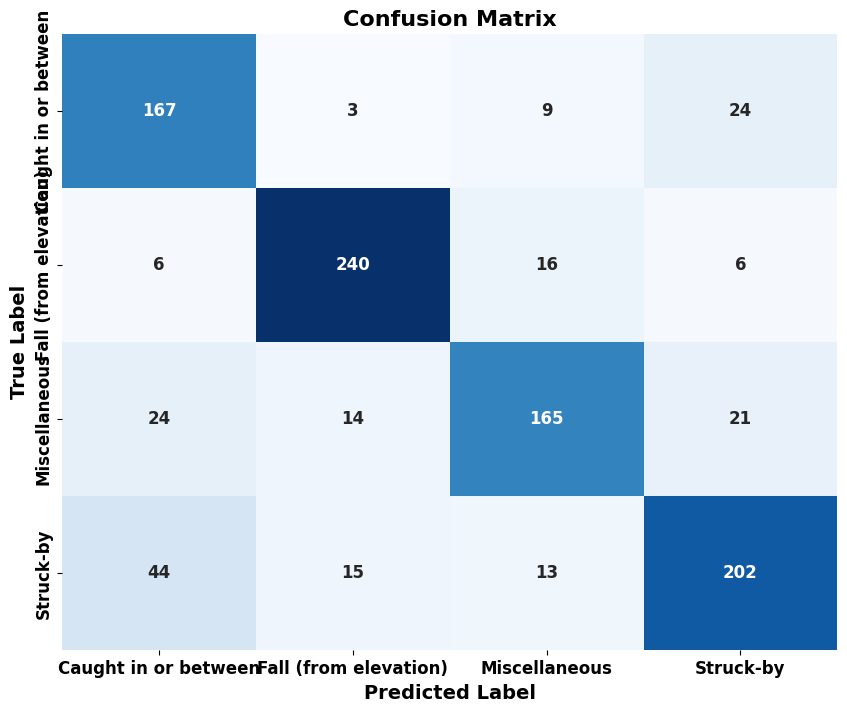

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_int, y_pred_classes)

# Define your class names or labels here
class_names = ['Caught in or between', 'Fall (from elevation)', 'Miscellaneous',
       'Struck-by']


plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names,
            annot_kws={"size": 12, "weight": "bold"}, cbar=False)
plt.title("Confusion Matrix", fontsize=16, fontweight='bold')
plt.xlabel("Predicted Label", fontsize=14, fontweight='bold')
plt.ylabel("True Label", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()


In [ ]:
# Define the indices
indices = [497, 3991, 3905, 2382, 1696, 1452, 61, 354]

# Create a DataFrame for the selected samples
selected_samples = data.loc[indices]

# Tokenize and pad the selected descriptions
selected_sequences = tokenizer.texts_to_sequences(selected_samples['cleaned_description'])
selected_padded = pad_sequences(selected_sequences, padding='post', maxlen=300)

# Make predictions
predicted_labels = np.argmax(loaded_model.predict(selected_padded), axis=1)

# Define the mapping from numeric labels to text class names
class_mapping = {
    0: 'Caught in or between',
    1: 'Fall (from elevation)',
    2: 'Miscellaneous',
    3: 'Struck-by'
}

# Map predicted labels to text class names
predicted_output_names = [class_mapping[label] for label in predicted_labels]


# Create the result table
result_table = pd.DataFrame({
    'Hazard description': selected_samples['Description'],
    'Actual Output': selected_samples['Tagged2'],
    'Predicted Output': predicted_output_names
}, index=indices)

# Display the result table
(result_table)


1/1 [==============================] - 2s 2s/step


,Hazard description,Actual Output,Predicted Output
497,EMPLOYEE FALLS FROM WORK PLATFORM AND IS KILLED,Fall (from elevation),Fall (from elevation)
3991,EMPLOYEE FALLS FROM TANKER AND IS KILLED,Fall (from elevation),Fall (from elevation)
3905,EMPLOYEE WORKING UNDER A TRAILER IS CRUSHED AN...,Caught in or between,Caught in or between
2382,EMPLOYEE STRUCK BY DUMP TRUCK IS KILLED,Struck-by,Struck-by
1696,EMPLOYEE #1'S THUMB PARTIALLY AMPUTATED IN WOO...,Struck-by,Caught in or between
1452,EMPLOYEE FALLS FROM LADDER AND SUFFERS UNSPECI...,Fall (from elevation),Fall (from elevation)
61,EMPLOYEE CONTACTS LIVE ELECTRICAL PARTS AND IS...,Miscellaneous,Miscellaneous
354,EMPLOYEE'S LEFT INDEX AND MIDDLE FINGERS ARE A...,Struck-by,Caught in or between


In [ ]:
# bilstm with 50 epochs.

In [ ]:
X=data['cleaned_description']
y=data['Tagged2']

max_features = 430
tokenizer = Tokenizer(num_words = max_features, )
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X, padding = 'post' ,maxlen=300)
y = pd.get_dummies(y).values

vocab_size = len(tokenizer.word_index)+1

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.20, random_state=42)
#print(X_train.shape,y_train.shape)
# print(X_test.shape,y_test.shape)

embid_dim = 300
lstm_out = 128

model = keras.Sequential()
model.add(Embedding(max_features, embid_dim, input_length = X.shape[1]))
model.add(Bidirectional(LSTM(lstm_out, dropout=0.2)))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))
model.summary()

batch_size = 128
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 50, batch_size=batch_size, verbose = 1, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

from sklearn.metrics import classification_report, accuracy_score

# Convert one-hot encoded labels back to integer labels for comparison
y_test_int = np.argmax(y_test, axis=1)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Calculate accuracy
accuracy = accuracy_score(y_test_int, y_pred_classes)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test_int, y_pred_classes)
print("Classification Report:\n", classification_rep)

In [ ]:
# C-Bi-LSTM

In [ ]:
import numpy as np
from keras.layers import Conv1D, MaxPooling1D, Flatten, Bidirectional, LSTM, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score

X=data['cleaned_description']
y=data['Tagged2']

max_features = 430
tokenizer = Tokenizer(num_words = max_features, )
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X, padding = 'post' ,maxlen=300)
y = pd.get_dummies(y).values

vocab_size = len(tokenizer.word_index)+1

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.20, random_state=42)
#print(X_train.shape,y_train.shape)
# print(X_test.shape,y_test.shape)

embid_dim = 300
lstm_out = 128

model = keras.Sequential()
model.add(Embedding(max_features, embid_dim, input_length=X.shape[1]))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(lstm_out, dropout=0.2)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

batch_size = 128
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 20, batch_size=batch_size, verbose = 1, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

from sklearn.metrics import classification_report, accuracy_score

# Convert one-hot encoded labels back to integer labels for comparison
y_test_int = np.argmax(y_test, axis=1)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Calculate accuracy
accuracy = accuracy_score(y_test_int, y_pred_classes)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test_int, y_pred_classes)
print("Classification Report:\n", classification_rep)

In [ ]:
# Convert one-hot encoded labels back to integer labels for comparison
y_test_int = np.argmax(y_test, axis=1)
y_pred = loaded_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

31/31 [==============================] - 9s 210ms/step


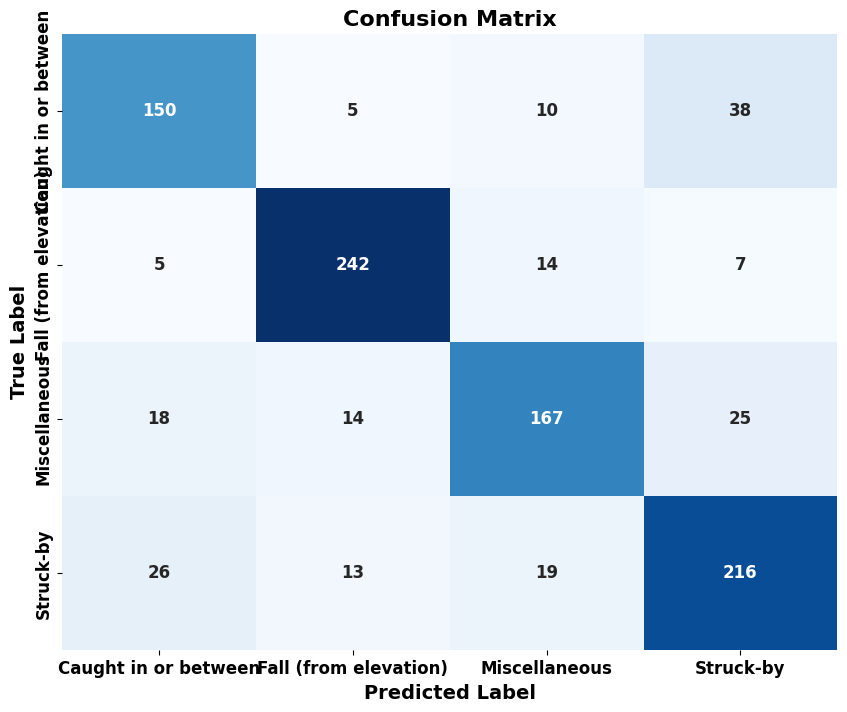

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_int, y_pred_classes)

# Define your class names or labels here
class_names = ['Caught in or between', 'Fall (from elevation)', 'Miscellaneous',
       'Struck-by']

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names,
            annot_kws={"size": 12, "weight": "bold"}, cbar=False)
plt.title("Confusion Matrix", fontsize=16, fontweight='bold')
plt.xlabel("Predicted Label", fontsize=14, fontweight='bold')
plt.ylabel("True Label", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()


In [ ]:
model.save('C-Bi-LSTM_model_0.80.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('C-Bi-LSTM_model_0.80.h5')

# Print the model summary
loaded_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 300)          129000    
                                                                 
 conv1d (Conv1D)             (None, 300, 64)           57664     
                                                                 
 max_pooling1d (MaxPooling1  (None, 150, 64)           0         
 D)                                                              
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               197632    
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)              

In [ ]:
# Define the indices
indices = [497, 3991, 3905, 2382, 1696, 1452, 61, 354]

# Create a DataFrame for the selected samples
selected_samples = data.loc[indices]

# Tokenize and pad the selected descriptions
selected_sequences = tokenizer.texts_to_sequences(selected_samples['cleaned_description'])
selected_padded = pad_sequences(selected_sequences, padding='post', maxlen=300)

# Make predictions
predicted_labels = np.argmax(loaded_model.predict(selected_padded), axis=1)

# Define the mapping from numeric labels to text class names
class_mapping = {
    0: 'Caught in or between',
    1: 'Fall (from elevation)',
    2: 'Miscellaneous',
    3: 'Struck-by'
}

# Map predicted labels to text class names
predicted_output_names = [class_mapping[label] for label in predicted_labels]


# Create the result table
result_table = pd.DataFrame({
    'Hazard description': selected_samples['Description'],
    'Actual Output': selected_samples['Tagged2'],
    'Predicted Output': predicted_output_names
}, index=indices)

# Display the result table
(result_table)


1/1 [==============================] - 2s 2s/step


,Hazard description,Actual Output,Predicted Output
497,EMPLOYEE FALLS FROM WORK PLATFORM AND IS KILLED,Fall (from elevation),Fall (from elevation)
3991,EMPLOYEE FALLS FROM TANKER AND IS KILLED,Fall (from elevation),Fall (from elevation)
3905,EMPLOYEE WORKING UNDER A TRAILER IS CRUSHED AN...,Caught in or between,Caught in or between
2382,EMPLOYEE STRUCK BY DUMP TRUCK IS KILLED,Struck-by,Struck-by
1696,EMPLOYEE #1'S THUMB PARTIALLY AMPUTATED IN WOO...,Struck-by,Caught in or between
1452,EMPLOYEE FALLS FROM LADDER AND SUFFERS UNSPECI...,Fall (from elevation),Fall (from elevation)
61,EMPLOYEE CONTACTS LIVE ELECTRICAL PARTS AND IS...,Miscellaneous,Miscellaneous
354,EMPLOYEE'S LEFT INDEX AND MIDDLE FINGERS ARE A...,Struck-by,Caught in or between


In [ ]:
# clstm and lstm with the same layers as above are not performing well.(around 27% accuracy only).

In [ ]:
# Training with Word2Vec Pre-trained and Trained Embeddings

In [ ]:
# Training a Word2Vec Embedding from scratch using Gensim library:

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
X=data['cleaned_description']
y=data['Tagged2']
y = pd.get_dummies(y).values

from tqdm import tqdm
sentences =[]
for t in  tqdm(range(len(X))):
    text = nltk.word_tokenize(X[t])
    sentences.append(text)

100%|██████████| 4845/4845 [00:00<00:00, 5373.50it/s]


In [ ]:
# sentences[:20]

In [ ]:
import numpy as np
import tensorflow as tf
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential


# Train Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)

# Define vocabulary size and embedding dimension
vocab_size = len(word2vec_model.wv.key_to_index)
embedding_dim = word2vec_model.vector_size

# Create embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for i, word in enumerate(word2vec_model.wv.index_to_key):
    embedding_vector = word2vec_model.wv[word]
    embedding_matrix[i] = embedding_vector

# Tokenize and convert sentences to sequences of word indices
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

# Pad sequences to a uniform length
max_sequence_length = max([len(seq) for seq in sequences])
X = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.20, random_state=42)
print(X_train.shape,y_train.shape)
# print(X_test.shape,y_test.shape)


(3876, 9) (3876, 4)


In [ ]:
embid_dim = 300
lstm_out = 128

# Build RNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(lstm_out, dropout=0.2)))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         212300    
                                                                 
 bidirectional_2 (Bidirecti  (None, 256)               234496    
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 4)                 260       
                                                      

In [ ]:
batch_size = 128
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 20, batch_size=batch_size, verbose = 1, validation_split=0.1)

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Convert one-hot encoded labels back to integer labels for comparison
y_test_int = np.argmax(y_test, axis=1)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Calculate accuracy
accuracy = accuracy_score(y_test_int, y_pred_classes)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test_int, y_pred_classes)
print("Classification Report:\n", classification_rep)


#  tfidf with lstm

In [ ]:
# XLNet
# pip install sentencepiece

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from transformers import XLNetTokenizer, TFXLNetForSequenceClassification
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Sample data
texts = data['cleaned_description']
labels = data['Tagged2']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
y = to_categorical(y, num_classes=len(label_encoder.classes_))

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(texts, y, test_size=0.2, random_state=42)

# Load XLNet tokenizer and model (smaller model)
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
model = TFXLNetForSequenceClassification.from_pretrained('xlnet-base-cased', num_labels=len(label_encoder.classes_))

# Tokenize and pad the input sequences
x_train_tokens = tokenizer(x_train.tolist(), padding=True, truncation=True, return_tensors='tf', max_length=128)
x_test_tokens = tokenizer(x_test.tolist(), padding=True, truncation=True, return_tensors='tf', max_length=128)

# Convert BatchEncoding objects to NumPy arrays
x_train_tokens_np = {key: np.array(value) for key, value in x_train_tokens.items()}
x_test_tokens_np = {key: np.array(value) for key, value in x_test_tokens.items()}

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(x_train_tokens_np, y_train, epochs=3, batch_size=32, validation_data=(x_test_tokens_np, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test_tokens_np, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Convert one-hot encoded labels back to integer labels for comparison
y_test_int = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test_tokens_np)['logits']
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_int, y_pred_classes)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test_int, y_pred_classes)
print("Classification Report:\n", classification_rep)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/565M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetForSequenceClassification: ['lm_loss']
- This IS expected if you are initializing TFXLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertF

Epoch 1/3


122/122 [==============================] - 1301s 10s/step - loss: 8.1020 - accuracy: 0.2629 - val_loss: 7.1026 - val_accuracy: 0.2766
Epoch 2/3
122/122 [==============================] - 1223s 10s/step - loss: 7.7056 - accuracy: 0.2688 - val_loss: 7.1026 - val_accuracy: 0.2766
Epoch 3/3
31/31 [==============================] - 76s 2s/step - loss: 7.1026 - accuracy: 0.2766
Accuracy: 27.66%
31/31 [==============================] - 79s 2s/step
Accuracy: 0.27657378740970073
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       203
           1       0.28      1.00      0.43       268
           2       0.00      0.00      0.00       224
           3       0.00      0.00      0.00       274

    accuracy                           0.28       969
   macro avg       0.07      0.25      0.11       969
weighted avg       0.08      0.28      0.12       969



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# cnn-rnn

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Sample data
texts = data['cleaned_description']
labels = data['Tagged2']

# Tokenize the text data
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
x = pad_sequences(sequences)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)


y = to_categorical(y, num_classes=len(label_encoder.classes_))

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create the model
model = Sequential()
model.add(Embedding(max_words, 100, input_length=x.shape[1]))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(LSTM(100))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))
model.summary()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Sample data
texts = data['cleaned_description']
labels = data['Tagged2']

# Tokenize the text data
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
x = pad_sequences(sequences)
print(x.shape[1])

369


In [ ]:
x.shape

(1000, 369)

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout
# from tensorflow.keras.regularizers import l2

# # Create the model
# model = Sequential()

# # Add Embedding layer
# model.add(Embedding(max_words, 100, input_length=x.shape[1]))

# # Add Conv1D layer with L2 regularization
# model.add(Conv1D(128, 5, activation='relu', kernel_regularizer=l2(0.01)))

# # Add MaxPooling1D layer
# model.add(MaxPooling1D(5))

# # Add LSTM layer with dropout
# model.add(LSTM(100, dropout=0.5, recurrent_dropout=0.5))

# # Add Dense layer with L2 regularization
# model.add(Dense(len(label_encoder.classes_), activation='softmax', kernel_regularizer=l2(0.01)))

# # Print model summary
# model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 369, 100)          100000    
                                                                 
 conv1d_2 (Conv1D)           (None, 365, 128)          64128     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 73, 128)           0         
 g1D)                                                            
                                                                 
 lstm_2 (LSTM)               (None, 100)               91600     
                                                                 
 dense_2 (Dense)             (None, 11)                1111      
                                                                 
Total params: 256839 (1003.28 KB)
Trainable params: 256839 (1003.28 KB)
Non-trainable params: 0 (0.00 Byte)
____________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Define EarlyStopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history=model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Epoch 1/30
122/122 [==============================] - 11s 28ms/step - loss: 0.9132 - accuracy: 0.6747 - val_loss: 0.5940 - val_accuracy: 0.7967
Epoch 2/30
122/122 [==============================] - 2s 16ms/step - loss: 0.5456 - accuracy: 0.8117 - val_loss: 0.5305 - val_accuracy: 0.8070
Epoch 3/30
122/122 [==============================] - 3s 22ms/step - loss: 0.4652 - accuracy: 0.8385 - val_loss: 0.5554 - val_accuracy: 0.8142
Epoch 4/30
122/122 [==============================] - 2s 19ms/step - loss: 0.4143 - accuracy: 0.8553 - val_loss: 0.5561 - val_accuracy: 0.8039
Epoch 5/30
122/122 [==============================] - 2s 17ms/step - loss: 0.3746 - accuracy: 0.8674 - val_loss: 0.6026 - val_accuracy: 0.8019
Epoch 6/30
122/122 [==============================] - 2s 17ms/step - loss: 0.3278 - accuracy: 0.8880 - val_loss: 0.6529 - val_accuracy: 0.7895
Epoch 7/30
122/122 [==============================] - 2s 17ms/step - loss: 0.2919 - accuracy: 0.9007 - val_loss: 0.6973 - val_accuracy: 0.795

In [ ]:
# y

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Convert one-hot encoded labels back to integer labels for comparison
y_test_int = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Calculate accuracy
accuracy = accuracy_score(y_test_int, y_pred_classes)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test_int, y_pred_classes)
print("Classification Report:\n", classification_rep)


31/31 [==============================] - 1s 5ms/step
Accuracy: 0.7585139318885449
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.76      0.70       203
           1       0.83      0.92      0.87       268
           2       0.78      0.73      0.76       224
           3       0.76      0.62      0.68       274

    accuracy                           0.76       969
   macro avg       0.75      0.76      0.75       969
weighted avg       0.76      0.76      0.76       969



In [ ]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
y_test_int = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test_int, y_pred_classes)

print("Confusion Matrix:")
print(cm)


31/31 [==============================] - 0s 6ms/step
Confusion Matrix:
[[154  10   8  31]
 [  5 247  11   5]
 [ 20  22 164  18]
 [ 57  20  27 170]]


In [ ]:
# y_test_int

In [ ]:
model.save('C-LSTM_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('C-LSTM_model.h5')

# Now you can use this loaded_model for predictions or further training


In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 369, 100)          100000    
                                                                 
 conv1d (Conv1D)             (None, 365, 128)          64128     
                                                                 
 max_pooling1d (MaxPooling1  (None, 73, 128)           0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 100)               91600     
                                                                 
 dense (Dense)               (None, 11)                1111      
                                                                 
Total params: 256839 (1003.28 KB)
Trainable params: 256839 (1003.28 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [ ]:
# from tensorflow.keras.models import load_model

# # Load the model
# loaded_model = load_model('C-LSTM_model.h5')

# # Now you can use this loaded_model for predictions or further training

# loaded_model.summary()

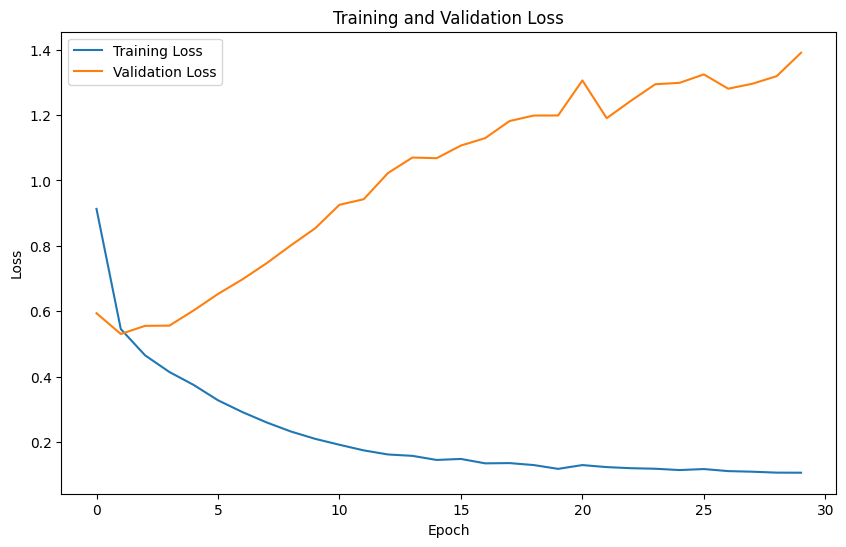

In [ ]:
# Plot training and validation loss curves
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

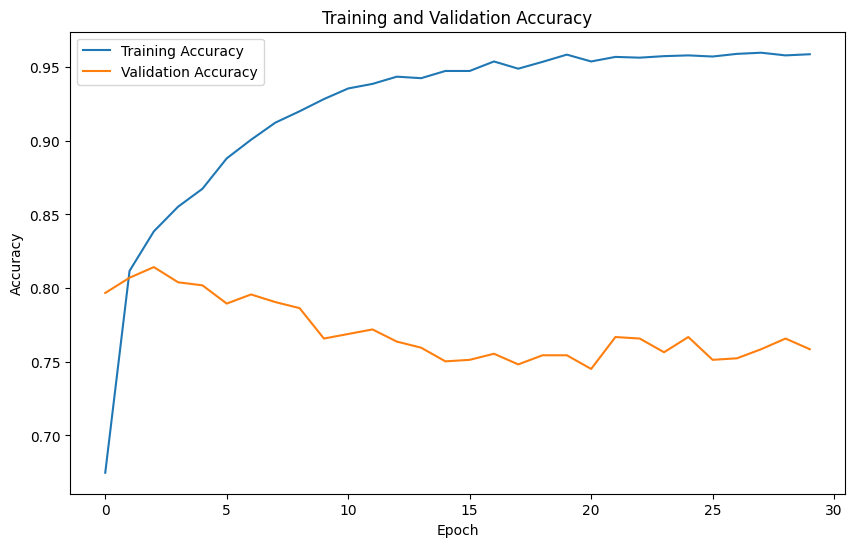

In [ ]:
# Plot training and validation accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# by using stratify split and class weights to handle class imbalance

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score

# Sample data
texts = data['cleaned_description']
labels = data['Tagged2']

# Tokenize the text data
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
x = pad_sequences(sequences)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
y_categorical = to_categorical(y, num_classes=len(label_encoder.classes_))

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced',classes= np.unique(y),y= y)

# Split the data into training and testing sets with stratified split and class weights
x_train, x_test, y_train, y_test = train_test_split(x, y_categorical, test_size=0.2, random_state=42, stratify=y, shuffle=True)

# Create the model
model = Sequential()
model.add(Embedding(max_words, 100, input_length=x.shape[1]))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(LSTM(100))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Fit the model with class weights
model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test), class_weight=dict(enumerate(class_weights)))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Convert one-hot encoded labels back to integer labels for comparison
y_test_int = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Calculate accuracy
accuracy = accuracy_score(y_test_int, y_pred_classes)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test_int, y_pred_classes)
print("Classification Report:\n", classification_rep)


In [ ]:
# with only 6 epochs

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Define EarlyStopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history=model.fit(x_train, y_train, epochs=6, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Convert one-hot encoded labels back to integer labels for comparison
y_test_int = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Calculate accuracy
accuracy = accuracy_score(y_test_int, y_pred_classes)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test_int, y_pred_classes)
print("Classification Report:\n", classification_rep)


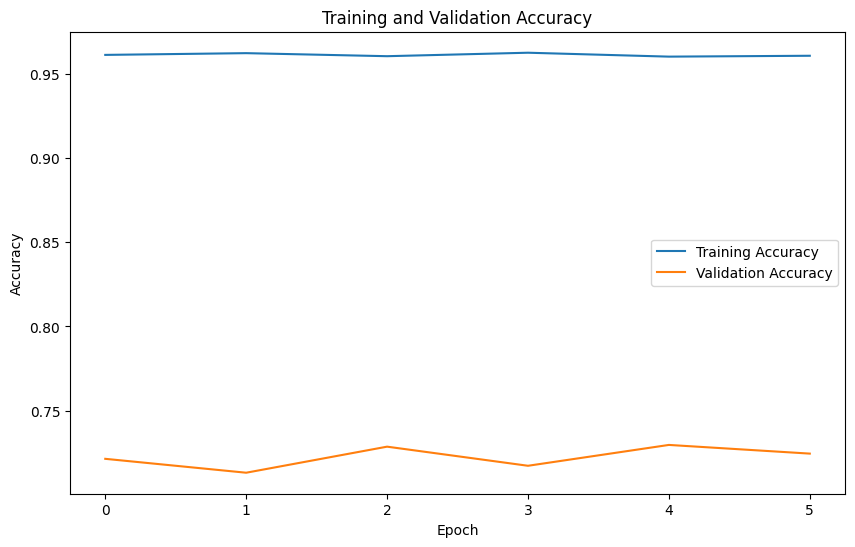

In [ ]:
# Plot training and validation accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

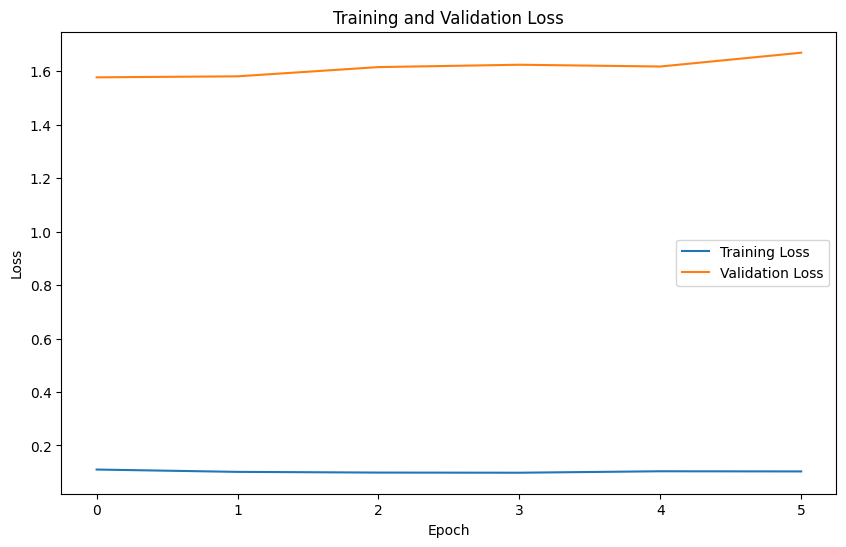

In [ ]:
# Plot training and validation loss curves
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# tfidf clstm

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv1D, MaxPooling1D, Bidirectional, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score

# Sample data
texts = data['cleaned_description']
labels = data['Tagged2']

# TF-IDF Vectorization
max_words = 1000
tfidf_vectorizer = TfidfVectorizer(max_features=max_words)
x_tfidf = tfidf_vectorizer.fit_transform(texts).toarray()

# Reshape data for Conv1D input
x_tfidf_reshaped = x_tfidf.reshape((x_tfidf.shape[0], x_tfidf.shape[1], 1))

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
y = to_categorical(y, num_classes=len(label_encoder.classes_))

# Split the data into training and testing sets
x_train_tfidf, x_test_tfidf, y_train, y_test = train_test_split(x_tfidf_reshaped, y, test_size=0.2, random_state=42)

# Create the model with Bidirectional LSTM and Conv1D
model = Sequential()
model.add(Conv1D(128, 5, activation='relu', input_shape=(max_words, 1)))
model.add(MaxPooling1D(5))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(x_train_tfidf, y_train, epochs=20, batch_size=32, validation_data=(x_test_tfidf, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test_tfidf, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Convert one-hot encoded labels back to integer labels for comparison
y_test_int = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test_tfidf)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_int, y_pred_classes)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test_int, y_pred_classes)
print("Classification Report:\n", classification_rep)


In [ ]:
#  c lstm lstm

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Sample data
texts = data['cleaned_description']
labels = data['Tagged2']

# Tokenize the text data
max_words = 500
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
x = pad_sequences(sequences)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)


y = to_categorical(y, num_classes=len(label_encoder.classes_))

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create the model
model = Sequential()
model.add(Embedding(max_words, 256, input_length=x.shape[1]))
model.add(Conv1D(128, 4, padding='valid'))
# model.add(Conv1D(128, 3, padding='valid'))
# model.add(Conv1D(128, 5, padding='valid'))
# model.add(MaxPooling1D(pool_size=5))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 9, 256)            128000    
                                                                 
 conv1d_6 (Conv1D)           (None, 6, 128)            131200    
                                                                 
 lstm_10 (LSTM)              (None, 6, 128)            131584    
                                                                 
 lstm_11 (LSTM)              (None, 128)               131584    
                                                                 
 dense_15 (Dense)            (None, 4)                 516       
                                                                 
Total params: 522884 (1.99 MB)
Trainable params: 522884 (1.99 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Define EarlyStopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history=model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Convert one-hot encoded labels back to integer labels for comparison
y_test_int = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Calculate accuracy
accuracy = accuracy_score(y_test_int, y_pred_classes)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test_int, y_pred_classes)
print("Classification Report:\n", classification_rep)

31/31 [==============================] - 2s 10ms/step
Accuracy: 0.782249742002064
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.76      0.72       203
           1       0.92      0.89      0.90       268
           2       0.83      0.73      0.78       224
           3       0.70      0.74      0.72       274

    accuracy                           0.78       969
   macro avg       0.78      0.78      0.78       969
weighted avg       0.79      0.78      0.78       969



In [ ]:
# c-lstm without maxpool

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Sample data
texts = data['cleaned_description']
labels = data['Tagged2']

# Tokenize the text data
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
x = pad_sequences(sequences)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)


y = to_categorical(y, num_classes=len(label_encoder.classes_))

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create the model
model = Sequential()
model.add(Embedding(max_words, 100, input_length=x.shape[1]))
model.add(Conv1D(128, 5, activation='relu'))
model.add(LSTM(100))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Define EarlyStopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history=model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Convert one-hot encoded labels back to integer labels for comparison
y_test_int = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Calculate accuracy
accuracy = accuracy_score(y_test_int, y_pred_classes)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test_int, y_pred_classes)
print("Classification Report:\n", classification_rep)


31/31 [==============================] - 1s 5ms/step
Accuracy: 0.7719298245614035
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.73      0.70       203
           1       0.89      0.91      0.90       268
           2       0.81      0.71      0.75       224
           3       0.71      0.72      0.71       274

    accuracy                           0.77       969
   macro avg       0.77      0.77      0.77       969
weighted avg       0.77      0.77      0.77       969



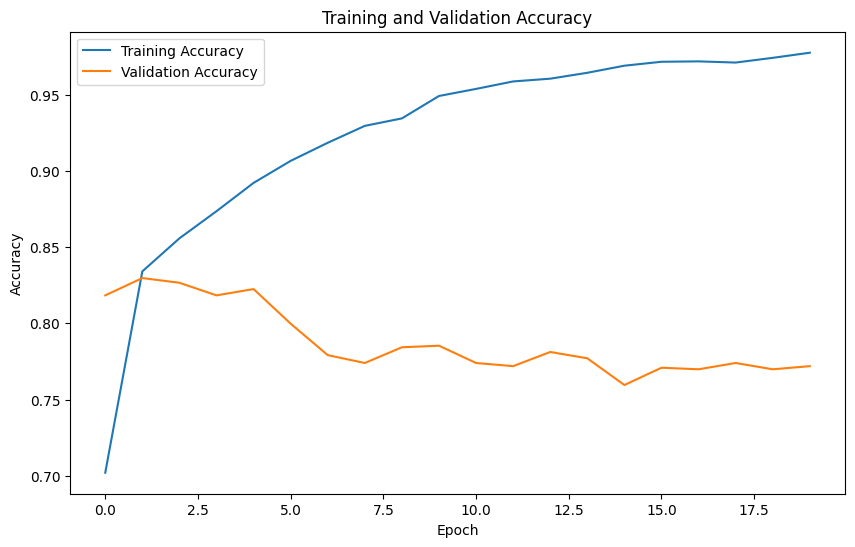

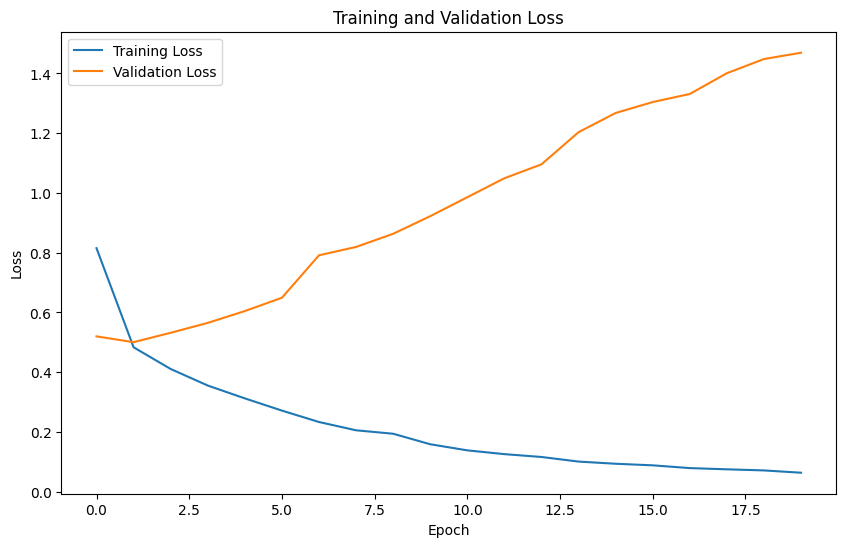

In [ ]:
# Plot training and validation accuracy curves
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss curves
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### word2vec CBiLstm model

In [ ]:
# !pip install gensim

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')  # Download NLTK tokenizer data (if not already downloaded)

texts = data['cleaned_description']
# Tokenize the text into words
tokenized_data = [word_tokenize(sentence.lower()) for sentence in texts]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

# Save the model to a binary file
word2vec_model.save('word2vec_model.bin')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from gensim.models import Word2Vec

# Load Word2Vec model
word2vec_model = Word2Vec.load('word2vec_model.bin')

word = 'worker'

if word in word2vec_model.wv.key_to_index:
    embedding_vector = word2vec_model.wv[word]
    print(f"Embedding vector for '{word}': {embedding_vector}")
else:
    print(f"'{word}' is not in the vocabulary.")

Embedding vector for 'worker': [-0.3378873   0.23174585 -0.04614184  0.08820435  0.16767663 -0.47958264
  0.14073676  0.7731141  -0.35106328 -0.1877695  -0.09444568 -0.43402013
 -0.09959769  0.38422698  0.10501654 -0.23827504  0.14315262 -0.18152432
 -0.15505482 -0.63782305  0.24289767  0.12154667  0.24366413 -0.15534638
  0.1073584  -0.12947917 -0.20566086 -0.05726371 -0.28969926  0.10693009
  0.09314132 -0.08067081  0.22766253 -0.2568817  -0.29719946  0.35076848
  0.029106   -0.24703464 -0.08823935 -0.4207074   0.08469809 -0.28405097
 -0.01619233  0.0513365   0.39978167  0.09458788 -0.296838   -0.10238974
  0.07810769  0.16749652  0.1951061  -0.05382614 -0.0827905  -0.05833367
 -0.0618074  -0.06537151  0.13955724 -0.11950751 -0.2550563   0.14812115
 -0.02169933 -0.07071444  0.07115658 -0.12842408 -0.34731326  0.31860492
  0.08379251  0.46934307 -0.44214386  0.53645563 -0.05762958  0.23072176
  0.3929574   0.0363588   0.3848219  -0.0426379   0.21137616 -0.0935401
 -0.20947456  0.04833

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import EarlyStopping

# Sample data
texts = data['cleaned_description']
labels = data['Tagged2']

# Tokenize the text data
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
x = pad_sequences(sequences)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

y = to_categorical(y, num_classes=len(label_encoder.classes_))

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Load your Word2Vec model and obtain the embedding matrix
# Replace 'your_word2vec_model.bin' with the actual path to your Word2Vec model
word2vec_model = Word2Vec.load('word2vec_model.bin')
embedding_matrix = np.zeros((max_words, word2vec_model.vector_size))

for word, i in tokenizer.word_index.items():
    if i < max_words:
        if word in word2vec_model.wv:
            embedding_matrix[i] = word2vec_model.wv[word]

# Create the model with Bidirectional LSTM and use the Word2Vec embedding matrix
model = Sequential()
model.add(Embedding(max_words, word2vec_model.vector_size, input_length=x.shape[1], weights=[embedding_matrix], trainable=False))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Define EarlyStopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

from sklearn.metrics import classification_report, accuracy_score

# Convert one-hot encoded labels back to integer labels for comparison
y_test_int = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Calculate accuracy
accuracy = accuracy_score(y_test_int, y_pred_classes)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test_int, y_pred_classes)
print("Classification Report:\n", classification_rep)


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 10, 100)           100000    
                                                                 
 conv1d_8 (Conv1D)           (None, 6, 128)            64128     
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 1, 128)            0         
 g1D)                                                            
                                                                 
 bidirectional_6 (Bidirecti  (None, 200)               183200    
 onal)                                                           
                                                                 
 dense_17 (Dense)            (None, 4)                 804       
                                                                 
Total params: 348132 (1.33 MB)
Trainable params: 2481

### word2vec CLstm model

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import EarlyStopping

# Sample data
texts = data['cleaned_description']
labels = data['Tagged2']

# Tokenize the text data
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
x = pad_sequences(sequences)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

y = to_categorical(y, num_classes=len(label_encoder.classes_))

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Load your Word2Vec model and obtain the embedding matrix
# Replace 'your_word2vec_model.bin' with the actual path to your Word2Vec model
word2vec_model = Word2Vec.load('word2vec_model.bin')
embedding_matrix = np.zeros((max_words, word2vec_model.vector_size))

for word, i in tokenizer.word_index.items():
    if i < max_words:
        if word in word2vec_model.wv:
            embedding_matrix[i] = word2vec_model.wv[word]

# Create the model with Bidirectional LSTM and use the Word2Vec embedding matrix
model = Sequential()
model.add(Embedding(max_words, word2vec_model.vector_size, input_length=x.shape[1], weights=[embedding_matrix], trainable=False))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(LSTM(100))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Define EarlyStopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

from sklearn.metrics import classification_report, accuracy_score

# Convert one-hot encoded labels back to integer labels for comparison
y_test_int = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Calculate accuracy
accuracy = accuracy_score(y_test_int, y_pred_classes)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test_int, y_pred_classes)
print("Classification Report:\n", classification_rep)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           100000    
                                                                 
 conv1d (Conv1D)             (None, 6, 128)            64128     
                                                                 
 max_pooling1d (MaxPooling1  (None, 1, 128)            0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 100)               91600     
                                                                 
 dense (Dense)               (None, 4)                 404       
                                                                 
Total params: 256132 (1000.52 KB)
Trainable params: 156132 (609.89 KB)
Non-trainable params: 100000 (390.62 KB)
__________

### Tf-Idf DNN model

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score

# Sample data
texts = data['cleaned_description']
labels = data['Tagged2']

# TF-IDF Vectorization
max_words = 1000
tfidf_vectorizer = TfidfVectorizer(max_features=max_words)
x_tfidf = tfidf_vectorizer.fit_transform(texts)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
y = to_categorical(y, num_classes=len(label_encoder.classes_))

# Split the data into training and testing sets
x_train_tfidf, x_test_tfidf, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.2, random_state=42)

# Create the model with Bidirectional LSTM
model = Sequential()
model.add(Dense(128, input_shape=(max_words,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Define EarlyStopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(x_train_tfidf.toarray(), y_train, epochs=30, batch_size=32, validation_data=(x_test_tfidf.toarray(), y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test_tfidf.toarray(), y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Convert one-hot encoded labels back to integer labels for comparison
y_test_int = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test_tfidf.toarray())
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_int, y_pred_classes)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test_int, y_pred_classes)
print("Classification Report:\n", classification_rep)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               128128    
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 136644 (533.77 KB)
Trainable params: 136644 (533.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
122/122 [==============================] - 2s 6ms/step - loss: 0.9939 - accuracy: 0.6956 - val_loss: 0.5378 - val_accuracy: 0.8111
Epoch 2/30
122/122 [==============================] - 1s 5ms/step - loss: 0.4872 - accuracy: 0.8400 - val_loss: 0.5048 - val_accuracy: 0

### Tf-Idf Lstm model

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score

# Sample data
texts = data['cleaned_description']
labels = data['Tagged2']

# TF-IDF Vectorization
max_words = 1000
tfidf_vectorizer = TfidfVectorizer(max_features=max_words)
x_tfidf = tfidf_vectorizer.fit_transform(texts).toarray()

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
y = to_categorical(y, num_classes=len(label_encoder.classes_))

# Split the data into training and testing sets
x_train_tfidf, x_test_tfidf, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.2, random_state=42)

# Reshape data for LSTM input (assuming a sequence length of 1)
x_train_tfidf_lstm = x_train_tfidf.reshape((x_train_tfidf.shape[0], 1, x_train_tfidf.shape[1]))
x_test_tfidf_lstm = x_test_tfidf.reshape((x_test_tfidf.shape[0], 1, x_test_tfidf.shape[1]))

# Create the model with LSTM
model = Sequential()
model.add(LSTM(100, input_shape=(1, max_words)))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(x_train_tfidf_lstm, y_train, epochs=20, batch_size=32, validation_data=(x_test_tfidf_lstm, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test_tfidf_lstm, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Convert one-hot encoded labels back to integer labels for comparison
y_test_int = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test_tfidf_lstm)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_int, y_pred_classes)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test_int, y_pred_classes)
print("Classification Report:\n", classification_rep)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               440400    
                                                                 
 dense_4 (Dense)             (None, 4)                 404       
                                                                 
Total params: 440804 (1.68 MB)
Trainable params: 440804 (1.68 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
122/122 [==============================] - 4s 14ms/step - loss: 1.2618 - accuracy: 0.6705 - val_loss: 1.0376 - val_accuracy: 0.7740
Epoch 2/20
122/122 [==============================] - 1s 10ms/step - loss: 0.7939 - accuracy: 0.8148 - val_loss: 0.6214 - val_accuracy: 0.8163
Epoch 3/20
122/122 [==============================] - 1s 9ms/step - loss: 0.5397 - accuracy: 0.8382 - val_loss: 0.5356 - val_acc

### Tf-Idf C-Bi-Lstm model

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv1D, MaxPooling1D, Bidirectional, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score

# Sample data
texts = data['cleaned_description']
labels = data['Tagged2']

# TF-IDF Vectorization
max_words = 1000
tfidf_vectorizer = TfidfVectorizer(max_features=max_words)
x_tfidf = tfidf_vectorizer.fit_transform(texts).toarray()

# Reshape data for Conv1D input
x_tfidf_reshaped = x_tfidf.reshape((x_tfidf.shape[0], x_tfidf.shape[1], 1))

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
y = to_categorical(y, num_classes=len(label_encoder.classes_))

# Split the data into training and testing sets
x_train_tfidf, x_test_tfidf, y_train, y_test = train_test_split(x_tfidf_reshaped, y, test_size=0.2, random_state=42)

# Create the model with Bidirectional LSTM and Conv1D
model = Sequential()
model.add(Conv1D(128, 5, activation='relu', input_shape=(max_words, 1)))
model.add(MaxPooling1D(5))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(x_train_tfidf, y_train, epochs=30, batch_size=32, validation_data=(x_test_tfidf, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test_tfidf, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Convert one-hot encoded labels back to integer labels for comparison
y_test_int = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test_tfidf)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_int, y_pred_classes)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test_int, y_pred_classes)
print("Classification Report:\n", classification_rep)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 996, 128)          768       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 199, 128)          0         
 g1D)                                                            
                                                                 
 bidirectional (Bidirection  (None, 200)               183200    
 al)                                                             
                                                                 
 dense_5 (Dense)             (None, 4)                 804       
                                                                 
Total params: 184772 (721.77 KB)
Trainable params: 184772 (721.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
122

### Glove CBiLstm model

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, accuracy_score

# Sample data
texts = data['cleaned_description']
labels = data['Tagged2']

# Tokenize the text data
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
x = pad_sequences(sequences)

# Load GloVe embeddings
glove_path = 'glove.6B.300d.txt'  # Replace with the actual path to your GloVe file

embeddings_index = {}
with open(glove_path, 'r', encoding='utf-8') as file:
    for line in file:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create an embedding matrix using GloVe embeddings
embedding_matrix = np.zeros((max_words, 300))  # Assuming GloVe 300-dimensional embeddings

for word, i in tokenizer.word_index.items():
    if i < max_words and word in embeddings_index:
        embedding_matrix[i] = embeddings_index[word]

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
y = to_categorical(y, num_classes=len(label_encoder.classes_))

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create the model with Bidirectional LSTM and GloVe embeddings
model = Sequential()
model.add(Embedding(max_words, 300, input_length=x.shape[1], weights=[embedding_matrix], trainable=False))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(LSTM(100))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Convert one-hot encoded labels back to integer labels for comparison
y_test_int = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_int, y_pred_classes)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test_int, y_pred_classes)
print("Classification Report:\n", classification_rep)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 300)           300000    
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 128)            192128    
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 1, 128)            0         
 g1D)                                                            
                                                                 
 lstm_3 (LSTM)               (None, 100)               91600     
                                                                 
 dense_6 (Dense)             (None, 4)                 404       
                                                                 
Total params: 584132 (2.23 MB)
Trainable params: 284132 (1.08 MB)
Non-trainable params: 300000 (1.14 MB)
_______________

### **word embedding using word2vec**

In [ ]:
from gensim.models import Word2Vec

# Load Word2Vec model
word2vec_model = Word2Vec.load('word2vec_model.bin')

word = 'worker'

if word in word2vec_model.wv.key_to_index:
    embedding_vector = word2vec_model.wv[word]
    print(f"Embedding vector for '{word}': {embedding_vector}")
else:
    print(f"'{word}' is not in the vocabulary.")

Embedding vector for 'worker': [-0.3378873   0.23174585 -0.04614184  0.08820435  0.16767663 -0.47958264
  0.14073676  0.7731141  -0.35106328 -0.1877695  -0.09444568 -0.43402013
 -0.09959769  0.38422698  0.10501654 -0.23827504  0.14315262 -0.18152432
 -0.15505482 -0.63782305  0.24289767  0.12154667  0.24366413 -0.15534638
  0.1073584  -0.12947917 -0.20566086 -0.05726371 -0.28969926  0.10693009
  0.09314132 -0.08067081  0.22766253 -0.2568817  -0.29719946  0.35076848
  0.029106   -0.24703464 -0.08823935 -0.4207074   0.08469809 -0.28405097
 -0.01619233  0.0513365   0.39978167  0.09458788 -0.296838   -0.10238974
  0.07810769  0.16749652  0.1951061  -0.05382614 -0.0827905  -0.05833367
 -0.0618074  -0.06537151  0.13955724 -0.11950751 -0.2550563   0.14812115
 -0.02169933 -0.07071444  0.07115658 -0.12842408 -0.34731326  0.31860492
  0.08379251  0.46934307 -0.44214386  0.53645563 -0.05762958  0.23072176
  0.3929574   0.0363588   0.3848219  -0.0426379   0.21137616 -0.0935401
 -0.20947456  0.04833

In [ ]:
from gensim.models import Word2Vec

# Load Word2Vec model
word2vec_model = Word2Vec.load('word2vec_model.bin')

word = 'example'

if word in word2vec_model.wv.key_to_index:
    embedding_vector = word2vec_model.wv[word]
    print(f"Embedding vector for '{word}': {embedding_vector}")
else:
    print(f"'{word}' is not in the vocabulary.")

'example' is not in the vocabulary.
